In [20]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, silhouette_score
from sklearn import preprocessing
from sklearn.cluster import KMeans

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

In [32]:
df_cluster = pd.read_csv('./case_study/dataset_merge.csv')

df_cluster.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
1665,TR67993,411,2022-10-23,P9,10000,2,20000,7,19,1,Single,0.00,Yoghurt,Buana Indah,Buana,General Trade,3.316694,114.590111
206,TR46326,165,2022-02-22,P9,10000,7,70000,12,44,1,Married,14.58,Yoghurt,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3980,TR66383,185,2022-12-01,P3,7500,5,37500,6,30,1,Married,3.28,Crackers,Lingga,Lingga,Modern Trade,-5.135399,119.423790
569,TR94326,167,2022-01-12,P9,10000,2,20000,13,28,1,Married,2.91,Yoghurt,Buana,Buana,General Trade,-1.269160,116.825264
2057,TR97982,193,2022-10-15,P2,3200,6,19200,5,42,0,Married,20.64,Ginger Candy,Bonafid,Gita,General Trade,-7.250445,112.768845


In [4]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TransactionID   5020 non-null   object 
 1   CustomerID      5020 non-null   int64  
 2   Date            5020 non-null   object 
 3   ProductID       5020 non-null   object 
 4   Price           5020 non-null   int64  
 5   Qty             5020 non-null   int64  
 6   TotalAmount     5020 non-null   int64  
 7   StoreID         5020 non-null   int64  
 8   Age             5020 non-null   int64  
 9   Gender          5020 non-null   int64  
 10  Marital Status  4976 non-null   object 
 11  Income          5020 non-null   float64
 12  Product Name    5020 non-null   object 
 13  StoreName       5020 non-null   object 
 14  GroupStore      5020 non-null   object 
 15  Type            5020 non-null   object 
 16  Latitude        5020 non-null   float64
 17  Longitude       5020 non-null   f

In [33]:
df_cluster['Date'] = pd.to_datetime(df_cluster['Date'], format="%Y-%m-%d")

In [23]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TransactionID   5020 non-null   object        
 1   CustomerID      5020 non-null   int64         
 2   Date            5020 non-null   datetime64[ns]
 3   ProductID       5020 non-null   object        
 4   Price           5020 non-null   int64         
 5   Qty             5020 non-null   int64         
 6   TotalAmount     5020 non-null   int64         
 7   StoreID         5020 non-null   int64         
 8   Age             5020 non-null   int64         
 9   Gender          5020 non-null   int64         
 10  Marital Status  4976 non-null   object        
 11  Income          5020 non-null   float64       
 12  Product Name    5020 non-null   object        
 13  StoreName       5020 non-null   object        
 14  GroupStore      5020 non-null   object        
 15  Type

In [34]:
df_cluster = df_cluster.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'Qty': 'sum',
    'TotalAmount': 'sum',
}).reset_index()

df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [35]:
df_cluster = df_cluster.drop(columns=['CustomerID'])

df_cluster_normalize = preprocessing.normalize(df_cluster)

In [36]:
df_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [37]:
K = range(2, 8)

fits = []
scores = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init = 'auto').fit(df_cluster_normalize)

    fits.append(model)
    scores.append(silhouette_score(df_cluster_normalize, model.labels_, metric='euclidean'))

<AxesSubplot:>

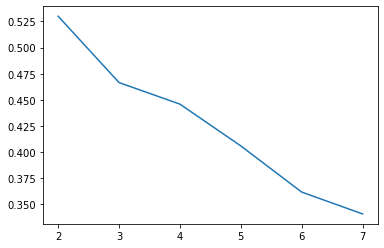

In [38]:
# choose 4 cluster 
sns.lineplot(x=K, y=scores)

In [39]:
df_cluster['cluster_label'] = fits[2].labels_

In [41]:
df_cluster.groupby(['cluster_label']).agg({
    # 'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean',
})

,TransactionID,Qty,TotalAmount
cluster_label,,,
0,10.969512,41.146341,345989.024390
1,10.866667,40.766667,292478.888889
2,11.714286,41.063492,414694.708995
3,7.250000,29.500000,150100.000000


Cluster 0 memiliki Qty paling tinggi namun menghasilkan totalmount kedua paling banyak. Untuk cluster ini mungkin bisa dilakukan promo untuk barang-barang mahal.
Cluster 2 menghasilkan totalmount paling tinggi namun qty kedua paling banyak. Untuk cluster ini mungkin bisa dilakukan promo untuk pembelian dengan jumlah barang tertentu.